In [1]:
import pickle

def pickle_load(file_name):
    file = open(file_name, 'rb')
    return pickle.load(file)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pickle_load('salary.pickle')

In [3]:
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.duplicated().sum() # 중복값은 아닐것으로 생각(우연히 겹침)

6374

In [5]:
df.isnull().sum()

age                  0
workclass         2799
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
class                0
dtype: int64

In [6]:
df[df['workclass'] == 'Never-worked']

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
8785,17,Never-worked,11th,7,Never-married,NaN,Own-child,Black,Female,0,0,20,United-States,<=50K
11607,20,Never-worked,HS-grad,9,Married-spouse-absent,NaN,Other-relative,White,Male,0,0,35,United-States,<=50K
13898,18,Never-worked,11th,7,Never-married,NaN,Own-child,White,Male,0,0,35,United-States,<=50K
21642,18,Never-worked,10th,6,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K
27126,23,Never-worked,7th-8th,4,Divorced,NaN,Not-in-family,White,Male,0,0,35,United-States,<=50K
31053,17,Never-worked,10th,6,Never-married,NaN,Own-child,White,Male,0,0,30,United-States,<=50K
36618,18,Never-worked,11th,7,Never-married,NaN,Own-child,White,Female,0,0,10,United-States,<=50K
39513,20,Never-worked,Some-college,10,Never-married,NaN,Own-child,Black,Male,0,0,40,United-States,<=50K
48585,30,Never-worked,HS-grad,9,Married-civ-spouse,NaN,Wife,Black,Female,0,0,40,United-States,<=50K
48595,18,Never-worked,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,4,United-States,<=50K


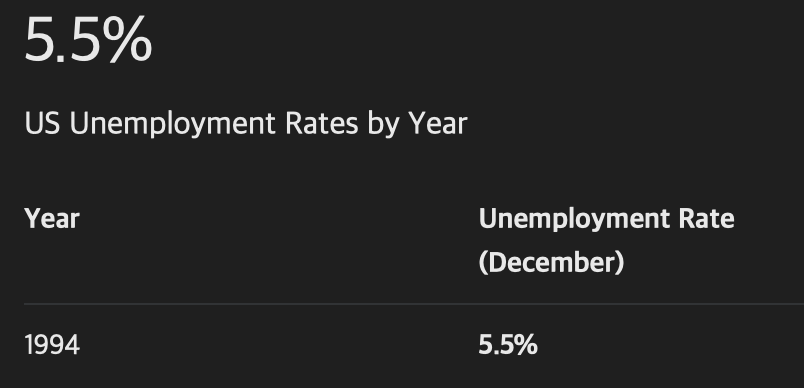

In [8]:
df['occupation'].isnull().sum() / df.shape[0] # 5.7% occupation 결측치는 무직자라고 생각됨

0.05751197739650301

In [9]:
df['relationship'].unique() # 가족 내 위치에 대한 column

array(['Own-child', 'Husband', 'Not-in-family', 'Unmarried', 'Wife',
       'Other-relative'], dtype=object)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      46033 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  47985 non-null  object
 13  class           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [11]:
df['native-country'].value_counts()

native-country
United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador      

In [12]:
43832 / df['native-country'].value_counts().sum() #전체 데이터셋 중 미국인의 비율

0.9134521204543087

In [13]:
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [14]:
df['class'] = df['class'].map({'<=50K': 0, '>50K': 1}) # 0번 5만불 이하, 1번 5만불 초과

In [15]:
tmp = df[df['occupation'].isnull()]

40.0690637237451

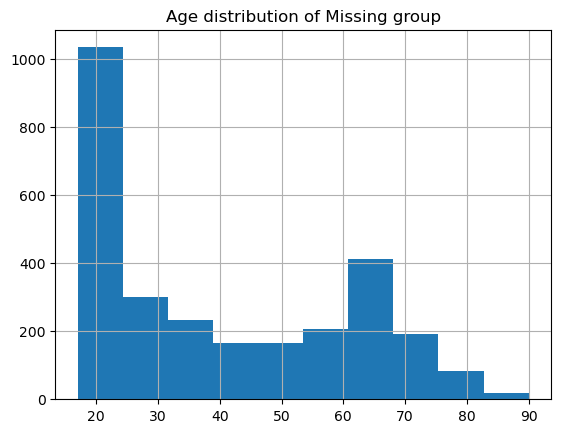

In [16]:
tmp['age'].hist()
plt.title('Age distribution of Missing group')

tmp['age'].mean()

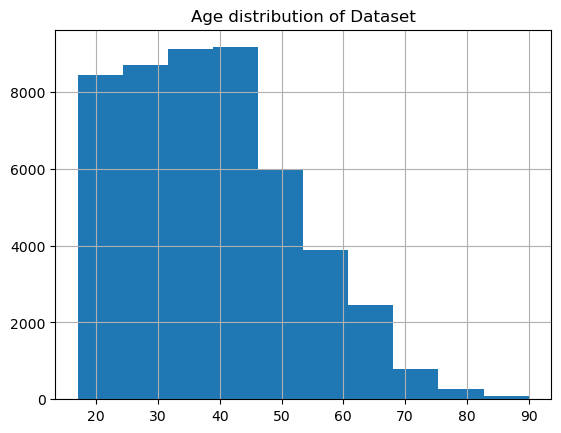

38.64358543876172

In [17]:
df['age'].hist()
plt.title('Age distribution of Dataset')
plt.show()

df.age.mean()

In [18]:
df.fillna({'native-country':'No_country'}, inplace=True)

In [19]:
df.isnull().sum()

age                  0
workclass         2799
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
class                0
dtype: int64

In [20]:
df.fillna({'workclass':'unemployed', 'occupation':'unemployed'}, inplace=True)

In [21]:
df.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

In [22]:
df.drop(['education'], axis=1, inplace=True)

In [23]:
df.columns

Index(['age', 'workclass', 'education-num', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'class'],
      dtype='object')

In [24]:
country_group = df.groupby(['native-country'])['class'].mean()

In [25]:
country_group

native-country
Cambodia                      0.321429
Canada                        0.346154
China                         0.295082
Columbia                      0.047059
Cuba                          0.246377
Dominican-Republic            0.048544
Ecuador                       0.133333
El-Salvador                   0.070968
England                       0.370079
France                        0.421053
Germany                       0.281553
Greece                        0.367347
Guatemala                     0.034091
Haiti                         0.120000
Holand-Netherlands            0.000000
Honduras                      0.100000
Hong                          0.266667
Hungary                       0.315789
India                         0.410596
Iran                          0.372881
Ireland                       0.297297
Italy                         0.323810
Jamaica                       0.141509
Japan                         0.347826
Laos                          0.086957
Mexico    

In [26]:
country_group = country_group.reset_index()

In [27]:
df = df.merge(country_group, on = 'native-country', how='left')

In [28]:
df.head(3)

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class_x,class_y
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0,0.243977
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0,0.243977
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1,0.243977


In [29]:
df.drop('native-country', axis=1, inplace=True)
df = df.rename(columns= {'class_x': 'class', 'class_y': 'native-country'})

In [30]:
df.head(3)

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,class,native-country
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,0,0.243977
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,0,0.243977
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,1,0.243977


In [31]:
obj_list = [] # 빈 리스트
for i in df.columns:
    if df[i].dtype == 'object': # ❶ 
        obj_list.append(i) # ❷     

In [32]:
df['sex'] = df['sex'].map({'Female': 0, 'Male': 1})

In [33]:
obj_list

['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex']

In [34]:
df[obj_list].head() # 범주형

,workclass,marital-status,occupation,relationship,race,sex
0,Private,Never-married,Machine-op-inspct,Own-child,Black,1
1,Private,Married-civ-spouse,Farming-fishing,Husband,White,1
2,Local-gov,Married-civ-spouse,Protective-serv,Husband,White,1
3,Private,Married-civ-spouse,Machine-op-inspct,Husband,Black,1
4,unemployed,Never-married,unemployed,Own-child,White,0


In [35]:
df.race.value_counts()

race
White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: count, dtype: int64

In [36]:
df = pd.get_dummies(df, drop_first=True)

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('class', axis=1), df['class'], test_size = 0.3, random_state = 100)

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
df.shape

(48842, 45)

In [40]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix
round(accuracy_score(y_test, pred), 3), confusion_matrix(y_test, pred)

(0.818,
 array([[9881, 1240],
        [1424, 2108]], dtype=int64))

In [42]:
train_pred = model.predict(X_train)

In [43]:
print('Train score:', round(accuracy_score(y_train, train_pred), 3), 'Test score:', accuracy_score(y_test, pred))

Train score: 0.976 Test score: 0.818194226438272


In [44]:
model.get_depth(), model.get_n_leaves(), model.get_params() # 하이퍼파라미터 설정을 안하면 매우 깊이 내려가서 과적합된다.

(54,
 6035,
 {'ccp_alpha': 0.0,
  'class_weight': None,
  'criterion': 'gini',
  'max_depth': None,
  'max_features': None,
  'max_leaf_nodes': None,
  'min_impurity_decrease': 0.0,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'min_weight_fraction_leaf': 0.0,
  'monotonic_cst': None,
  'random_state': None,
  'splitter': 'best'})

In [45]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
print('Train score:', accuracy_score(y_train, train_pred), 'Test score:', accuracy_score(y_test, test_pred))

Train score: 0.9759279300359764 Test score: 0.8174435269228144


In [46]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
print('Train score:', accuracy_score(y_train, train_pred), 'Test score:', accuracy_score(y_test, test_pred))

Train score: 0.8445991400742929 Test score: 0.8432402920903569


In [47]:
model = DecisionTreeClassifier(max_depth=7)
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
print('Train score:', accuracy_score(y_train, train_pred), 'Test score:', accuracy_score(y_test, test_pred))

# 깊이가 깊어질수록 Train_score 증가, Test score은 증가하다가 감소

Train score: 0.8579367632864372 Test score: 0.852726404149321


In [48]:
dt_params = {
        'criterion' : ["gini", "entropy", "log_loss"],
#         'max_depth' : [5, 7, 10, 15, 20, 25, 30] 결과 10
#         'max_depth' : [i+8 for i in range(7)] 결과 11
        'max_depth' : [3]
}


In [49]:
from sklearn.model_selection import GridSearchCV


dt_grid = GridSearchCV(model, param_grid=dt_params, scoring='accuracy', n_jobs=-1)
dt_grid.fit(X_train, y_train)


GridSearchCV(estimator=DecisionTreeClassifier(max_depth=7), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3]},
             scoring='accuracy')

In [50]:
dt_grid.best_params_, dt_grid.best_score_

({'criterion': 'entropy', 'max_depth': 3}, 0.8438971354144943)

In [51]:
model = DecisionTreeClassifier(max_depth=3, criterion='entropy')
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
print('Train score:', round(accuracy_score(y_train, train_pred), 3), 'Test score:', round(accuracy_score(y_test, test_pred), 3))

Train score: 0.845 Test score: 0.843


# 앙상블 모델(Random Forest)과 비교

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('class', axis=1), df['class'], test_size = 0.3, random_state = 20)

In [55]:
rf = RandomForestClassifier(oob_score=True)

In [56]:
rf.fit(X_train, y_train)
pred = rf.predict(X_test)

accuracy_score(y_test, pred), confusion_matrix(y_test, pred)

(0.853681839896267,
 array([[10251,   825],
        [ 1319,  2258]], dtype=int64))

In [57]:
rf.oob_score_

0.8474070607505338

In [58]:
rf_params = {
        'n_estimators' : [100, 120, 150],
        'max_features': [7],
        'max_depth' : [10, 12, 15, None]
}

rf_grid = GridSearchCV(rf, param_grid=rf_params, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train, y_train)


GridSearchCV(estimator=RandomForestClassifier(oob_score=True), n_jobs=-1,
             param_grid={'max_depth': [10, 12, 15, None], 'max_features': [7],
                         'n_estimators': [100, 120, 150]},
             scoring='accuracy')

In [59]:
rf_grid.best_estimator_, rf_grid.best_score_

(RandomForestClassifier(max_depth=15, max_features=7, oob_score=True),
 0.8642838335172207)

In [60]:
rf = RandomForestClassifier(max_depth=15, max_features=7, n_estimators=150, oob_score=True)

In [61]:
rf.fit(X_train, y_train)
pred = rf.predict(X_test)

accuracy_score(y_test, pred)

0.8639186514706886

In [62]:
rf.oob_score_

0.8644593290239551

##### 더 높은 정확도를 가지고 과적합에서도 자유로운 모습을 보여주지만 의사결정나무는 단일 트리로 시각화하여 의사결정 과정을 한 눈에 볼 수 있다. 

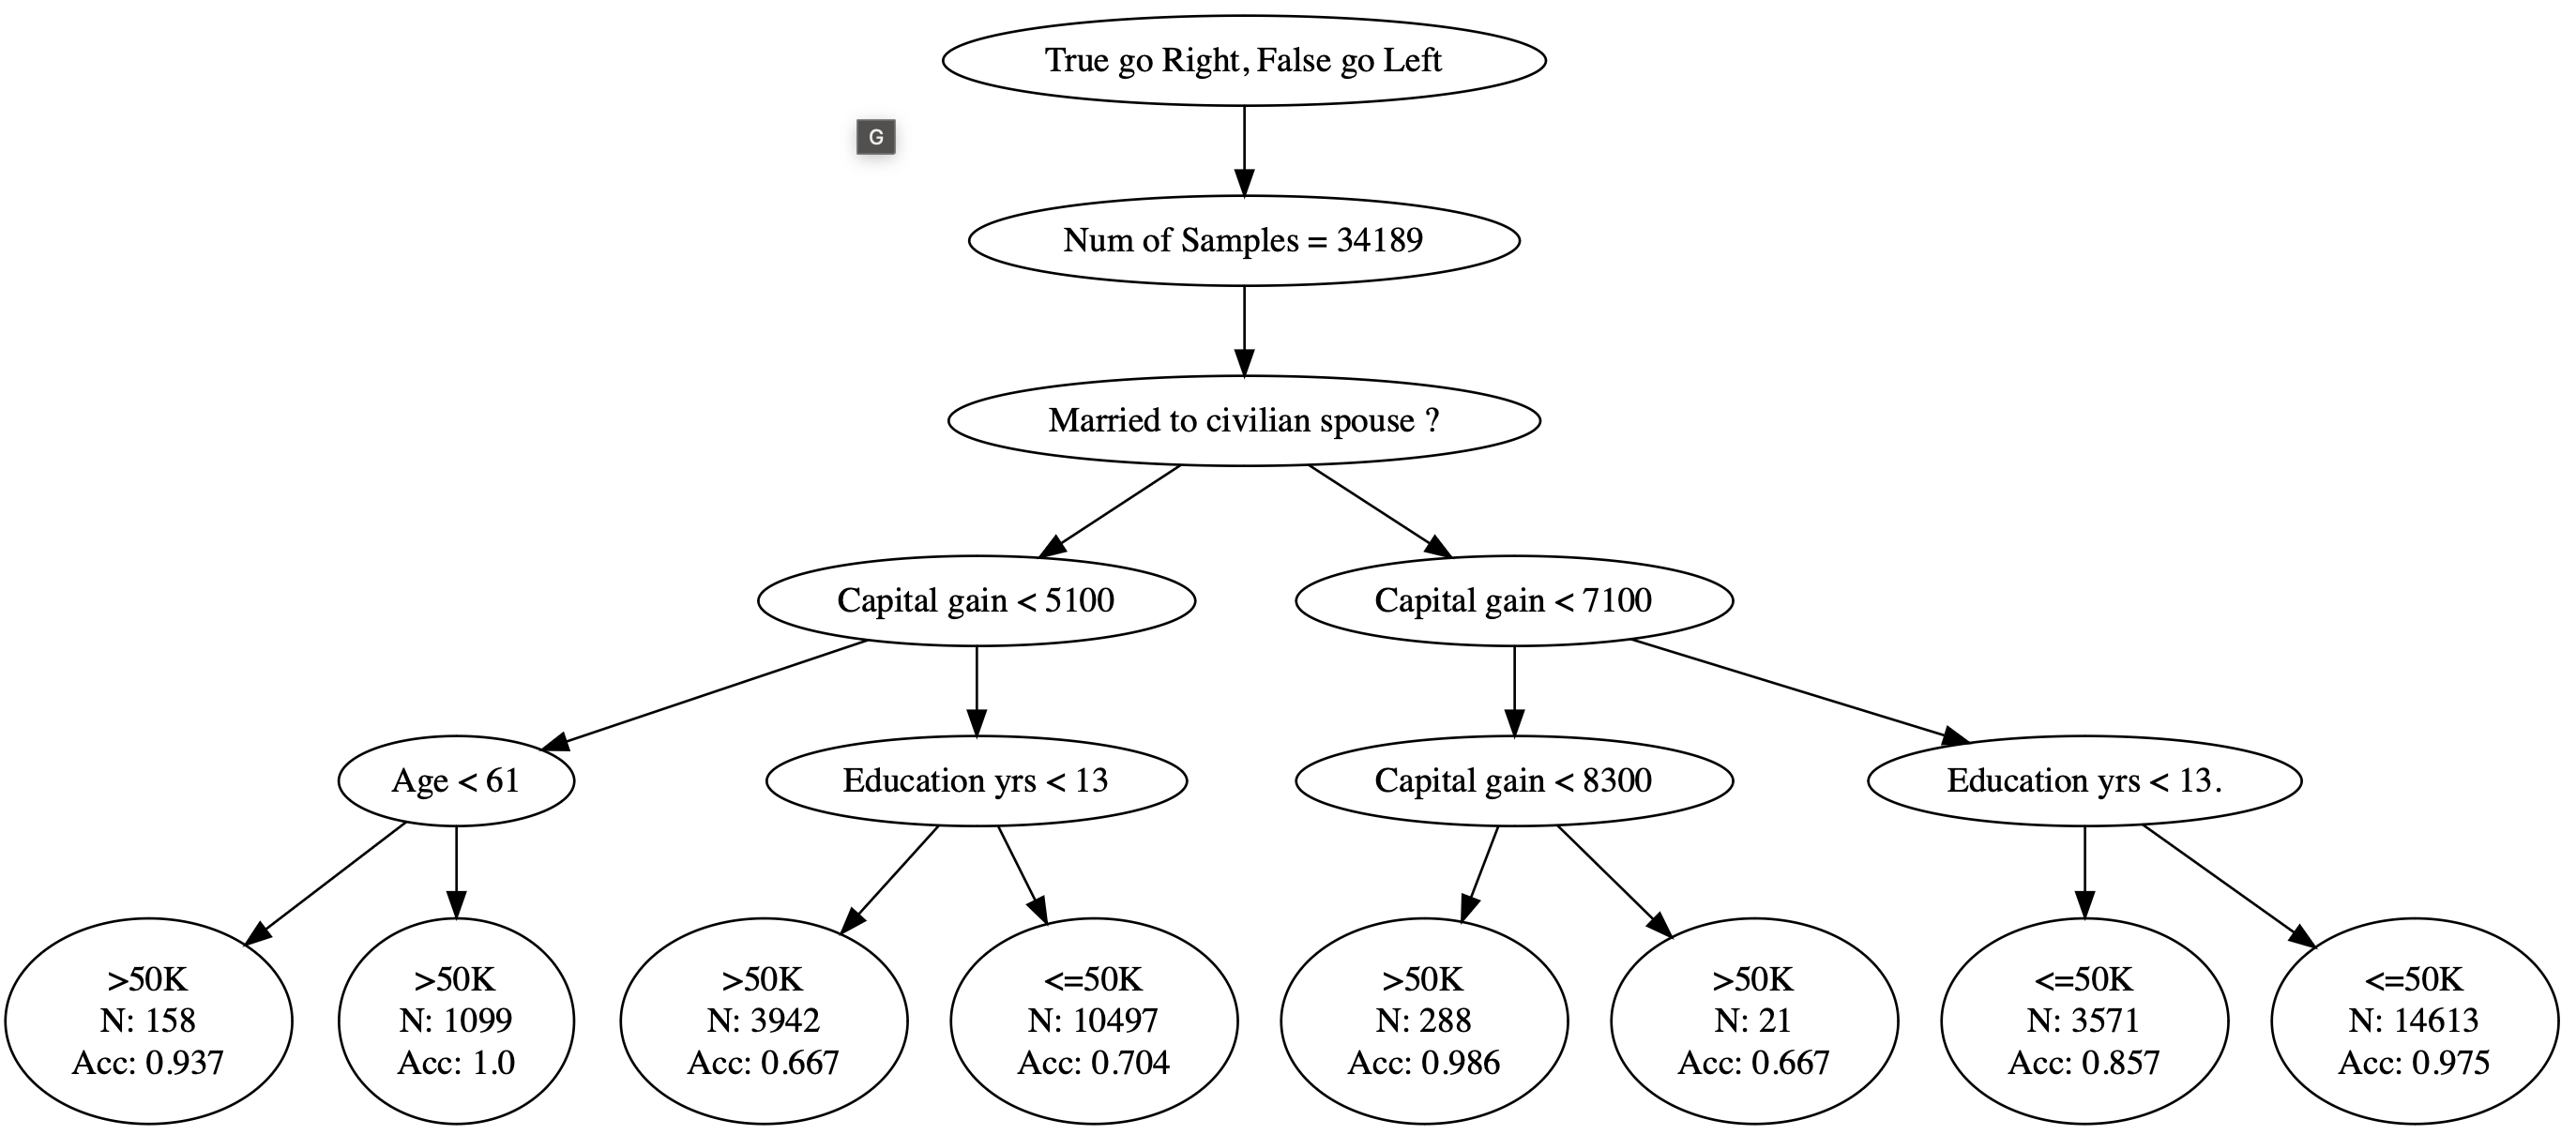